# Importação das Bibliotecas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from cycler import cycler

# Leitura do CSV

In [21]:
DADOS = r"C:\Users\rodri\Downloads\Vendas\retail_sales_dataset.csv"

df_vendas = pd.read_csv(DADOS)

df_vendas.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df_vendas.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df_vendas.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# Criação dos Gráficos

In [57]:
# Converter a coluna 'Date' para o formato datetime
df_vendas['Date'] = pd.to_datetime(df_vendas['Date'], format='%d/%m/%Y')

# Criar uma nova coluna 'YearMonth' combinando ano e mês
df_vendas['YearMonth'] = df_vendas['Date'].dt.to_period('M')

df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   YearMonth         1000 non-null   period[M]     
dtypes: datetime64[ns](1), int64(5), object(3), period[M](1)
memory usage: 78.2+ KB


In [58]:
df_vendas

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,YearMonth
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12


In [62]:
# Agrupar os valores de Total Amount por mês
df_mes_agrupado = df_vendas.groupby('YearMonth')['Total Amount'].sum().reset_index()

df_mes_agrupado

,YearMonth,Total Amount
0,2023-01,35450
1,2023-02,44060
2,2023-03,28990
3,2023-04,33870
4,2023-05,53150
5,2023-06,36715
6,2023-07,35465
7,2023-08,36960
8,2023-09,23620
9,2023-10,46580


In [97]:
# Função para formatar valores de forma compacta
def formatar_valor(valor):
    if valor >= 1_000_000:
        return f"R$ {valor / 1_000_000:.1f}M".replace(".", ",")  # Milhões
    elif valor >= 1_000:
        return f"R$ {valor / 1_000:.1f}K".replace(".", ",")  # Milhares
    else:
        return f"R$ {valor:.0f}".replace(".", ",")  # Valores pequenos

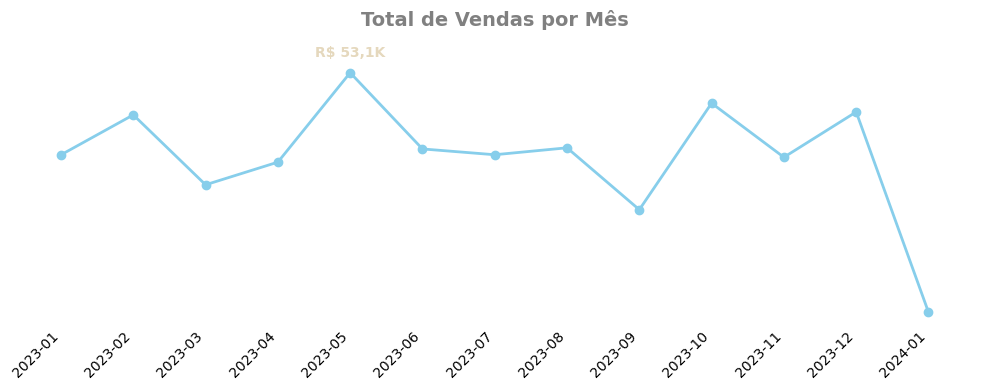

In [129]:
df_mes_agrupado["YearMonth"] = df_mes_agrupado["YearMonth"].astype(str)

# dados
x_mes = df_mes_agrupado["YearMonth"]
y_venda_mes = df_mes_agrupado["Total Amount"]

# Cores
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 4))

# Adicionar linha
ax.plot(x_mes, y_venda_mes, marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=6, label="Venda Total")

# Título
ax.set_title("Total de Vendas por Mês", fontsize=14, fontweight='bold', color='gray', pad=25)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Identificar o índice do maior valor
max_index = y.idxmax()

# Adicionar valores no gráfico
for i, value in enumerate(y):
    if i == max_index:  # Adiciona rótulo apenas para o maior valor
        ax.text(x[max_index], 
               y[max_index] + max(y) * 0.05,  # Posição ajustada acima do ponto
               formatar_valor(value),  # Usar a função de formatação compacta
               # f"R$ {value:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), 
               ha='center', va='bottom', fontsize=10, color=cores[6], fontweight='bold',
               bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5')
               )

# Tirar as bordas dos eixos
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remover o eixo Y
ax.set_yticks([])
# Remover os tracinhos do eixo X
ax.tick_params(axis="x", length=0) 

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

## Valor Total por Categoria

In [10]:
# df_vendas_agrupado = df_vendas.groupby('Produto')['Valor Total'].sum().reset_index()
df_vendas_agrupado = df_vendas.groupby('Product Category')['Total Amount'].sum().reset_index()

df_vendas_agrupado.head()

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


In [33]:
print(f"Listagem das Categorias de Produtos")
print(df_vendas_agrupado["Product Category"])

print("-----")

print(f"Listagem dos Valores Totais")
print(df_vendas_agrupado["Total Amount"])


Listagem das Categorias de Produtos
0         Beauty
1       Clothing
2    Electronics
Name: Product Category, dtype: object
-----
Listagem dos Valores Totais
0    143515
1    155580
2    156905
Name: Total Amount, dtype: int64


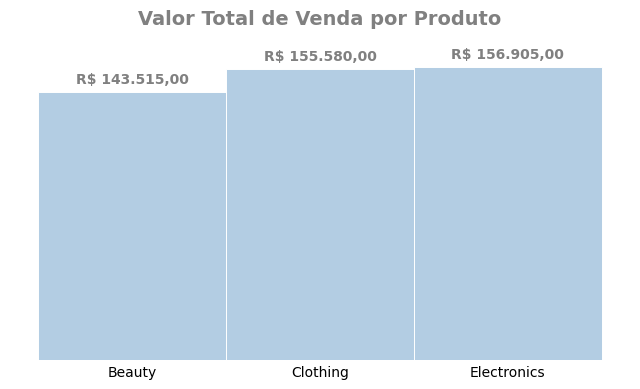

In [136]:
# Dados
x = df_vendas_agrupado["Product Category"]
y = df_vendas_agrupado["Total Amount"]

# Cores
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 4))

barras = ax.bar(x, y, 
       width=1, 
       edgecolor="white", 
       linewidth=0.7, 
       color=cores[1]
      )

# barras[2].set_color('darkred')
# barras[2].set_alpha(0.8)

# Adicionar rótulos de dados acima das barras
for i, value in enumerate(y):
    # Formatar como moeda BRL com duas casas decimais
    formatted_value = f"R$ {value:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    
    ax.text(i, value + max(y) * 0.02,  # Posição X e Y ajustada
            formatted_value,  # Formato de moeda BRL
            # f"{value:.2f}",  # Formato do rótulo
            # f"R$ {locale.currency(value, grouping=True)}",  # Formato de moeda BRL,
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="grey",
           fontweight="bold"
           )

# Remover o eixo Y
ax.set_yticks([])

# Remover os tracinhos do eixo X
ax.tick_params(axis="x", length=0) 

# Remover as linhas do eixo
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_title("Valor Total de Venda por Produto", pad=20, color="gray", fontsize=14, fontweight="bold")

plt.show()

## Quantidade Total por Categoria

In [14]:
# df_vendas_agrupado = df_vendas.groupby('Produto')['Valor Total'].sum().reset_index()
df_quantidade_vendida_agrupado = df_vendas.groupby('Product Category')['Quantity'].sum().reset_index()

df_quantidade_vendida_agrupado.head()

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [37]:
print(f"Listagem das Categorias de Produtos")
print(df_quantidade_vendida_agrupado["Product Category"])

print("-----")

print(f"Listagem das Quantidades Totais")
print(df_quantidade_vendida_agrupado["Quantity"])

Listagem das Categorias de Produtos
0         Beauty
1       Clothing
2    Electronics
Name: Product Category, dtype: object
-----
Listagem das Quantidades Totais
0    771
1    894
2    849
Name: Quantity, dtype: int64


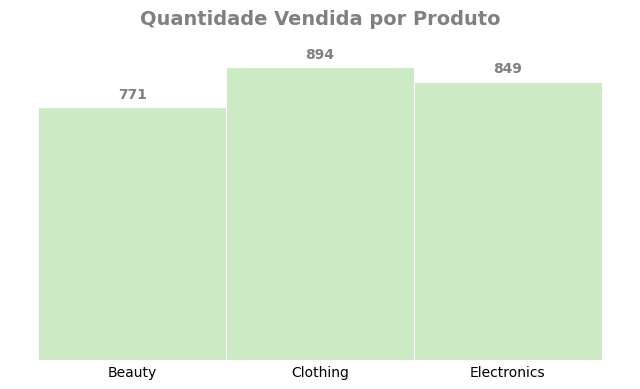

In [118]:
# Dados
x = df_quantidade_vendida_agrupado["Product Category"]
y = df_quantidade_vendida_agrupado["Quantity"]

cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(x, y, 
       width=1, 
       edgecolor="white", 
       linewidth=0.7, 
       color=cores[2]
      )

# Adicionar rótulos de dados acima das barras
for i, value in enumerate(y):
    ax.text(i, value + max(y) * 0.02,  # Posição X e Y ajustada
            f"{value:.0f}",  # Formato do rótulo
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="grey",
           fontweight="bold"
           )

# Remover o eixo Y
ax.set_yticks([])  # Remove os valores do eixo Y

# Remover os tracinhos do eixo X
ax.tick_params(axis="x", length=0) 

# Remover as linhas do eixo
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_title("Quantidade Vendida por Produto", pad=20, fontsize=14, color="gray", fontweight="bold")

plt.show()

In [16]:
# Calcular o total de vendas
total_vendas = df_vendas["Total Amount"].sum()
print(round(total_vendas, 2))  # Apenas exibe o valor arredondado
# total_vendas agora contém o valor original

# Calcular o total de quantidade vendida
total_quantidade_vendida = df_vendas["Quantity"].sum()
print(round(total_quantidade_vendida, 2))  # Apenas exibe o valor arredondado
# total_quantidade_vendida agora contém o valor original

# Média de vendas por quantidade
ticket_medio = total_vendas / total_quantidade_vendida
print(round(ticket_medio, 2))  # Exibir o resultado arredondado

456000
2514
181.38


In [18]:
# Agrupar por 'Produto' e somar 'Valor Total' e 'Quantidade'
df_ticket_medio = df_vendas.groupby('Product Category')[['Total Amount', 'Quantity']].sum().reset_index()

# Calcular o ticket médio (Valor Total / Quantidade)
df_ticket_medio['Ticket Médio'] = df_ticket_medio['Total Amount'] / df_ticket_medio['Quantity']

# Arredondar a coluna 'Ticket Médio' para duas casas decimais
df_ticket_medio['Ticket Médio'] = df_ticket_medio['Ticket Médio'].round(2)

# Exibir as 5 primeiras linhas do DataFrame resultante
df_ticket_medio.head()

,Product Category,Total Amount,Quantity,Ticket Médio
0,Beauty,143515,771,186.14
1,Clothing,155580,894,174.03
2,Electronics,156905,849,184.81


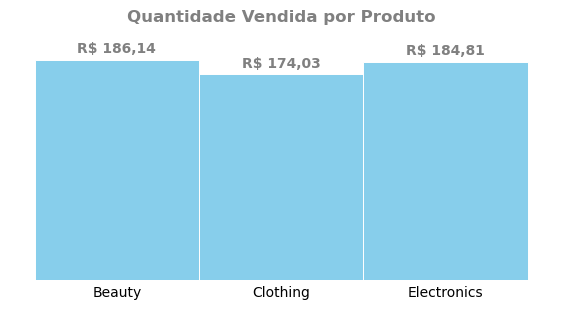

In [19]:
# Dados
x = df_ticket_medio["Product Category"]
y = df_ticket_medio["Ticket Médio"]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(7, 3))

ax.bar(x, y, 
       width=1, 
       edgecolor="white", 
       linewidth=0.7, 
       color= "skyblue"
      )

# Adicionar rótulos de dados acima das barras
for i, value in enumerate(y):
    # Formatar como moeda BRL com duas casas decimais
    formatted_value = f"R$ {value:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    
    ax.text(i, value + max(y) * 0.02,  # Posição X e Y ajustada
            formatted_value,
            # f"{value:.2f}",  # Formato do rótulo
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="grey",
           fontweight="bold"
           )

# Remover o eixo Y
ax.set_yticks([])  # Remove os valores do eixo Y

# Remover os tracinhos do eixo X
ax.tick_params(axis="x", length=0) 

# Remover as linhas do eixo
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_title("Quantidade Vendida por Produto", pad=20, color="gray", fontweight="bold")

plt.show()

# Construção do Mosaico

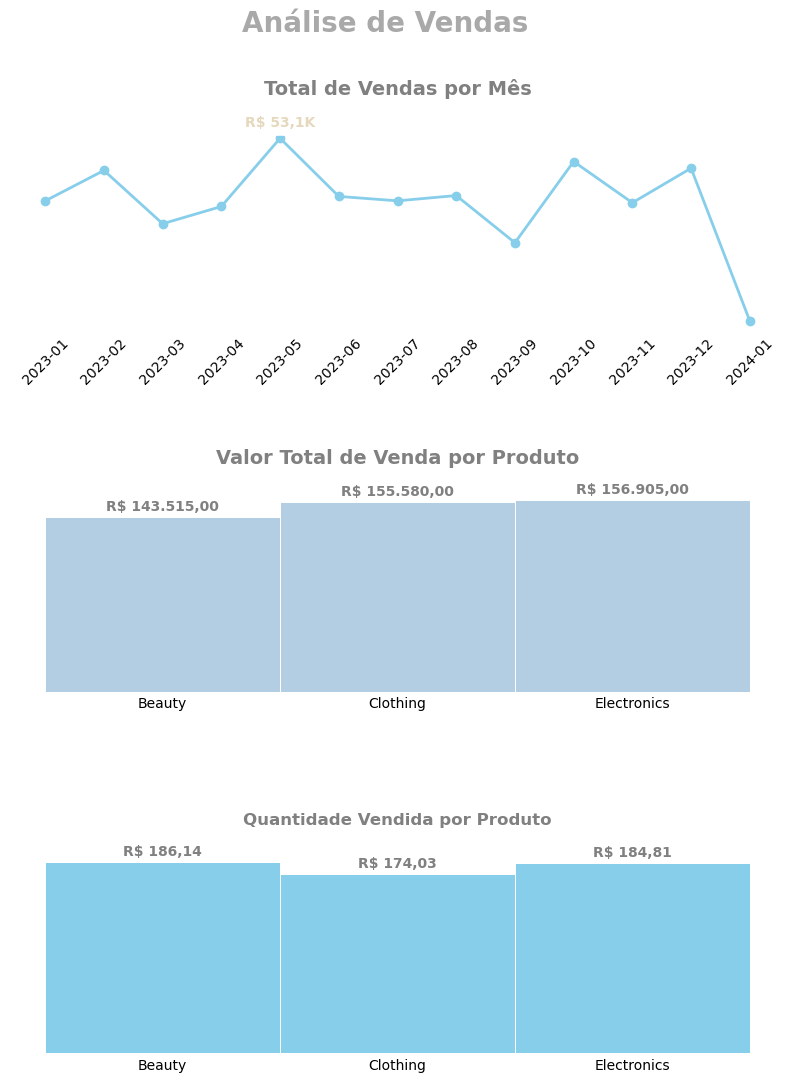

In [148]:
# Cores
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

# Criando o mosaico
mosaico = "AA;BB;CC"
fig = plt.figure(figsize=(10, 12))
espacamento = {'wspace': 0.8, 'hspace': 0.8}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

# -------------- Primeiro Gráfico

# dados
x_mes = df_mes_agrupado["YearMonth"]
y_venda_mes = df_mes_agrupado["Total Amount"]

# Adicionar linha no gráfico 'A'
axs['A'].plot(x_mes, y_venda_mes, marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=6, label="Venda Total")

# Título
axs['A'].set_title("Total de Vendas por Mês", fontsize=14, fontweight='bold', color='gray', pad=25)

# Rotacionar os rótulos do eixo X para melhor visualização
axs['A'].tick_params(axis="x", labelrotation=45)

# Identificar o índice do maior valor
max_index = y_venda_mes.idxmax()

# Adicionar valores no gráfico
for i, value in enumerate(y_venda_mes):
    if i == max_index:  # Adiciona rótulo apenas para o maior valor
        axs['A'].text(x_mes[max_index], 
               y_venda_mes[max_index] + max(y_venda_mes) * 0.05,  # Posição ajustada acima do ponto
               formatar_valor(value),  # Usar a função de formatação compacta
               ha='center', va='bottom', fontsize=10, color=cores[6], fontweight='bold',
               bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5')
               )

# Tirar as bordas dos eixos
axs['A'].spines['top'].set_visible(False)
axs['A'].spines['bottom'].set_visible(False)
axs['A'].spines['right'].set_visible(False)
axs['A'].spines['left'].set_visible(False)

# Remover o eixo Y
axs['A'].set_yticks([])
# Remover os tracinhos do eixo X
axs['A'].tick_params(axis="x", length=0) 

# -------------- Segundo Gráfico

# Dados
x = df_vendas_agrupado["Product Category"]
y = df_vendas_agrupado["Total Amount"]

barras = axs['B'].bar(x, y, 
       width=1, 
       edgecolor="white", 
       linewidth=0.7, 
       color=cores[1]
      )

# barras[2].set_color('darkred')
# barras[2].set_alpha(0.8)

# Adicionar rótulos de dados acima das barras
for i, value in enumerate(y):
    # Formatar como moeda BRL com duas casas decimais
    formatted_value = f"R$ {value:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    
    axs['B'].text(i, value + max(y) * 0.02,  # Posição X e Y ajustada
            formatted_value,  # Formato de moeda BRL
            # f"{value:.2f}",  # Formato do rótulo
            # f"R$ {locale.currency(value, grouping=True)}",  # Formato de moeda BRL,
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="grey",
           fontweight="bold"
           )

# Remover o eixo Y
axs['B'].set_yticks([])

# Remover os tracinhos do eixo X
axs['B'].tick_params(axis="x", length=0) 

# Remover as linhas do eixo
axs['B'].spines["left"].set_visible(False)
axs['B'].spines["right"].set_visible(False)
axs['B'].spines["top"].set_visible(False)
axs['B'].spines["bottom"].set_visible(False)

axs['B'].set_title("Valor Total de Venda por Produto", pad=20, color="gray", fontsize=14, fontweight="bold")

# -------------- Terceiro Gráfico

# Dados
x = df_ticket_medio["Product Category"]
y = df_ticket_medio["Ticket Médio"]

axs['C'].bar(x, y, 
       width=1, 
       edgecolor="white", 
       linewidth=0.7, 
       color= "skyblue"
      )

# Adicionar rótulos de dados acima das barras
for i, value in enumerate(y):
    # Formatar como moeda BRL com duas casas decimais
    formatted_value = f"R$ {value:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    
    axs['C'].text(i, value + max(y) * 0.02,  # Posição X e Y ajustada
            formatted_value,
            # f"{value:.2f}",  # Formato do rótulo
            ha="center", 
            va="bottom", 
            fontsize=10, 
            color="grey",
           fontweight="bold"
           )

# Remover o eixo Y
axs['C'].set_yticks([])  # Remove os valores do eixo Y

# Remover os tracinhos do eixo X
axs['C'].tick_params(axis="x", length=0) 

# Remover as linhas do eixo
axs['C'].spines["left"].set_visible(False)
axs['C'].spines["right"].set_visible(False)
axs['C'].spines["top"].set_visible(False)
axs['C'].spines["bottom"].set_visible(False)

axs['C'].set_title("Quantidade Vendida por Produto", pad=20, color="gray", fontweight="bold")

# configurando a figura e exibindo -------------------------------------------------------

# título da figura
fig.suptitle('Análise de Vendas', fontsize=20, fontweight='bold', color='darkgrey')

# salvando a figura
plt.savefig('mosaico.png', dpi=300)

# Mostrando a figura
plt.show()